In [1]:
import cv2
from darkflow.net.build import TFNet

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.











In [2]:
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
options = {
    'model':'cfg/yolo.cfg',
    'load':'bin/yolov2.weights',
    'threshold':0.3
}

tfnet = TFNet(options)

/home/god/yolo/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.04848217964172363s
Model has a coco model name, loading coco labels.

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1

In [9]:
img = cv2.imread('image.jpg',cv2.IMREAD_COLOR)
res = tfnet.return_predict(img)

img.shape

(200, 300, 3)

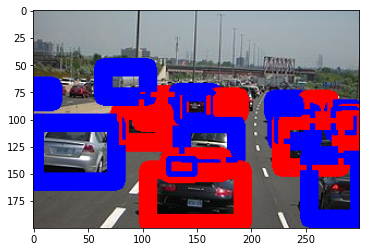

In [25]:
i = 0
t1 = (res[0]['topleft']['x'],res[0]['topleft']['y'])
t2 = (res[0]['bottomright']['x'],res[0]['bottomright']['y'])
label = res[0]['label']
img = cv2.rectangle(img,t1,t2,(255,0,0),4)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [24]:
res

[{'label': 'person',
  'confidence': 0.31499273,
  'topleft': {'x': 124, 'y': 136},
  'bottomright': {'x': 148, 'y': 150}},
 {'label': 'car',
  'confidence': 0.40308192,
  'topleft': {'x': 0, 'y': 69},
  'bottomright': {'x': 18, 'y': 84}},
 {'label': 'car',
  'confidence': 0.72003317,
  'topleft': {'x': 99, 'y': 77},
  'bottomright': {'x': 134, 'y': 103}},
 {'label': 'car',
  'confidence': 0.72980785,
  'topleft': {'x': 132, 'y': 75},
  'bottomright': {'x': 165, 'y': 102}},
 {'label': 'car',
  'confidence': 0.34915942,
  'topleft': {'x': 167, 'y': 79},
  'bottomright': {'x': 189, 'y': 95}},
 {'label': 'car',
  'confidence': 0.40802294,
  'topleft': {'x': 220, 'y': 81},
  'bottomright': {'x': 245, 'y': 95}},
 {'label': 'car',
  'confidence': 0.5266765,
  'topleft': {'x': 251, 'y': 81},
  'bottomright': {'x': 272, 'y': 95}},
 {'label': 'car',
  'confidence': 0.3736569,
  'topleft': {'x': 275, 'y': 90},
  'bottomright': {'x': 296, 'y': 112}},
 {'label': 'car',
  'confidence': 0.61669797,


In [29]:
url_a = 'https://www.google.com/search?ei=1m7NWePfFYaGmQG51q7IBg&hl=en&q={}'
url_b = '\&tbm=isch&ved=0ahUKEwjjovnD7sjWAhUGQyYKHTmrC2kQuT0I7gEoAQ&start=0'
url_c = '\&yv=2&vet=10ahUKEwjjovnD7sjWAhUGQyYKHTmrC2kQuT0I7gEoAQ.1m7NWePfFYaGmQG51q7IBg'
url_d = '\.i&ijn=1&asearch=ichunk&async=_id:rg_s,_pms:s'
url_base = ''.join((url_a, url_b, url_c, url_d))
search_name = 'cardamage'
url = url_base.format(search_name)
url

'https://www.google.com/search?ei=1m7NWePfFYaGmQG51q7IBg&hl=en&q=cardamage\\&tbm=isch&ved=0ahUKEwjjovnD7sjWAhUGQyYKHTmrC2kQuT0I7gEoAQ&start=0\\&yv=2&vet=10ahUKEwjjovnD7sjWAhUGQyYKHTmrC2kQuT0I7gEoAQ.1m7NWePfFYaGmQG51q7IBg\\.i&ijn=1&asearch=ichunk&async=_id:rg_s,_pms:s'